# **Tarea 2: histograma del ejercicio awk: iniciando la conversación con grandes datafiles**
Autor:                              
[Jorge Lizarazo](https://www.researchgate.net/profile/Jorge-Lizarazo-Borrero)

**17/11/2023**

______________________________
Proyecto creado para la clase de Procesamiento Distribuido a cargo del [Dr. Gabriel Tamura](https://www.researchgate.net/profile/Gabriel-Tamura)




## Descarga y Manipulación en Cygwin

En Cygwin se realizó una serie de tareas relacionadas con la manipulación de archivos y procesamiento de datos. En primer lugar, se dirigió al directorio /cygdrive/e (disco duro externo y mecánico) y procedió a descargar tres archivos grandes desde enlaces de SharePoint utilizando el comando wget. Luego, se verificó la integridad de los dos primeros archivos descargados con éxito utilizando el comando zip -T. Sin embargo, se encontró con un problema relacionado con la corrupción del tercer archivo (datag-p3.zip), que luego volvió a descargar y verificó con éxito. A continuación, descomprimimos los tres archivos descargados y combinó su contenido en un solo archivo llamado datagrams-std.zip, el cual también verificó exitosamente. Finalmente, descomprimió datagrams-std.zip, lo que resultó en la creación de un archivo CSV grande llamado datagrams-nonstd.csv, y filtró datos específicos de una fecha (28-ABR-19) utilizando el comando awk y los guardó en output-28-APR-19.csv.

Para la verificación del proceso diríjase a:

[Code_Cygwin](https://github.com/jorgelizarazo94/Distribuido_1/blob/cb90e381ac8c6bcbca46be64bb1663cfc14e9ee3/Descarga/Code_Cygwin)


## Procesamiento con lenguaje Python

Se realiza entonces el procesamiento de un archivo CSV llamado output-28-APR-19.csv en Google Colab utilizando Pandas y otras bibliotecas. El archivo CSV se lee en un DataFrame, se renombran las columnas, se eliminan algunas columnas no deseadas, se ajustan las columnas de latitud y longitud, se formatea la columna de fecha y hora, y finalmente se realiza un conteo de registros por hora. Este procesamiento prepara los datos para análisis y visualización posteriores.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd  ####
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Procesamiento_distribuido/output-28-APR-19.csv',
                 sep=',',  header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,28-APR-19,500450,5,34626367,-765179900,432,131,416,6186982087,27-APR-19 05.27.37.000000 PM,309
1,0,28-APR-19,-1,-1,33586667,-765115033,-1,-1,-1,6186982088,27-APR-19 05.27.37.000000 PM,389
2,0,28-APR-19,516107,238,34018233,-765044967,138,352,71,6186982089,27-APR-19 05.27.37.000000 PM,748


In [ ]:
column_names = ['gh', 'Fecha', 'Columna3', 'Columna4', 'Lat', 'Long',
                'Columna6', 'Columna7', 'Columna8', 'Columna9',
                'Date', 'ID']
df.columns = column_names
df = df.drop(['gh'], axis=1)
df2 = df.copy()
df2['Lat'] = df2['Lat'].astype(float) / 10000000
df2['Long'] = df2['Long'].astype(float) / 10000000

print(df2.head())

       Fecha  Columna3  Columna4       Lat       Long  Columna6  Columna7  \
0  28-APR-19    500450         5  3.462637 -76.517990       432       131   
1  28-APR-19        -1        -1  3.358667 -76.511503        -1        -1   
2  28-APR-19    516107       238  3.401823 -76.504497       138       352   
3  28-APR-19        -1     11483  3.358687 -76.512022        -1        -1   
4  28-APR-19    513101        61  3.467902 -76.501777       189       282   

   Columna8    Columna9                          Date   ID  
0       416  6186982087  27-APR-19 05.27.37.000000 PM  309  
1        -1  6186982088  27-APR-19 05.27.37.000000 PM  389  
2        71  6186982089  27-APR-19 05.27.37.000000 PM  748  
3        -1  6186982090  27-APR-19 05.27.37.000000 PM  396  
4       146  6186982091  27-APR-19 05.27.37.000000 PM  169  


In [ ]:
# formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y %I.%M.%S.%f %p')
df['Hour'] = df['Date'].dt.hour

In [ ]:
hourly_counts = df.groupby('Hour').size()

## Visualización

Se crearon dos gráficos para representar las frecuencias de buses del MIO por hora. El primer gráfico es un gráfico de barras que muestra las frecuencias normalizadas de eventos a lo largo del día, con colores graduales en grises a negros para representar las frecuencias. El segundo gráfico es un gráfico polar que presenta las mismas frecuencias normalizadas en forma de un reloj circular. Estas visualizaciones proporcionan una representación efectiva de la distribución de eventos a lo largo de las horas del día.

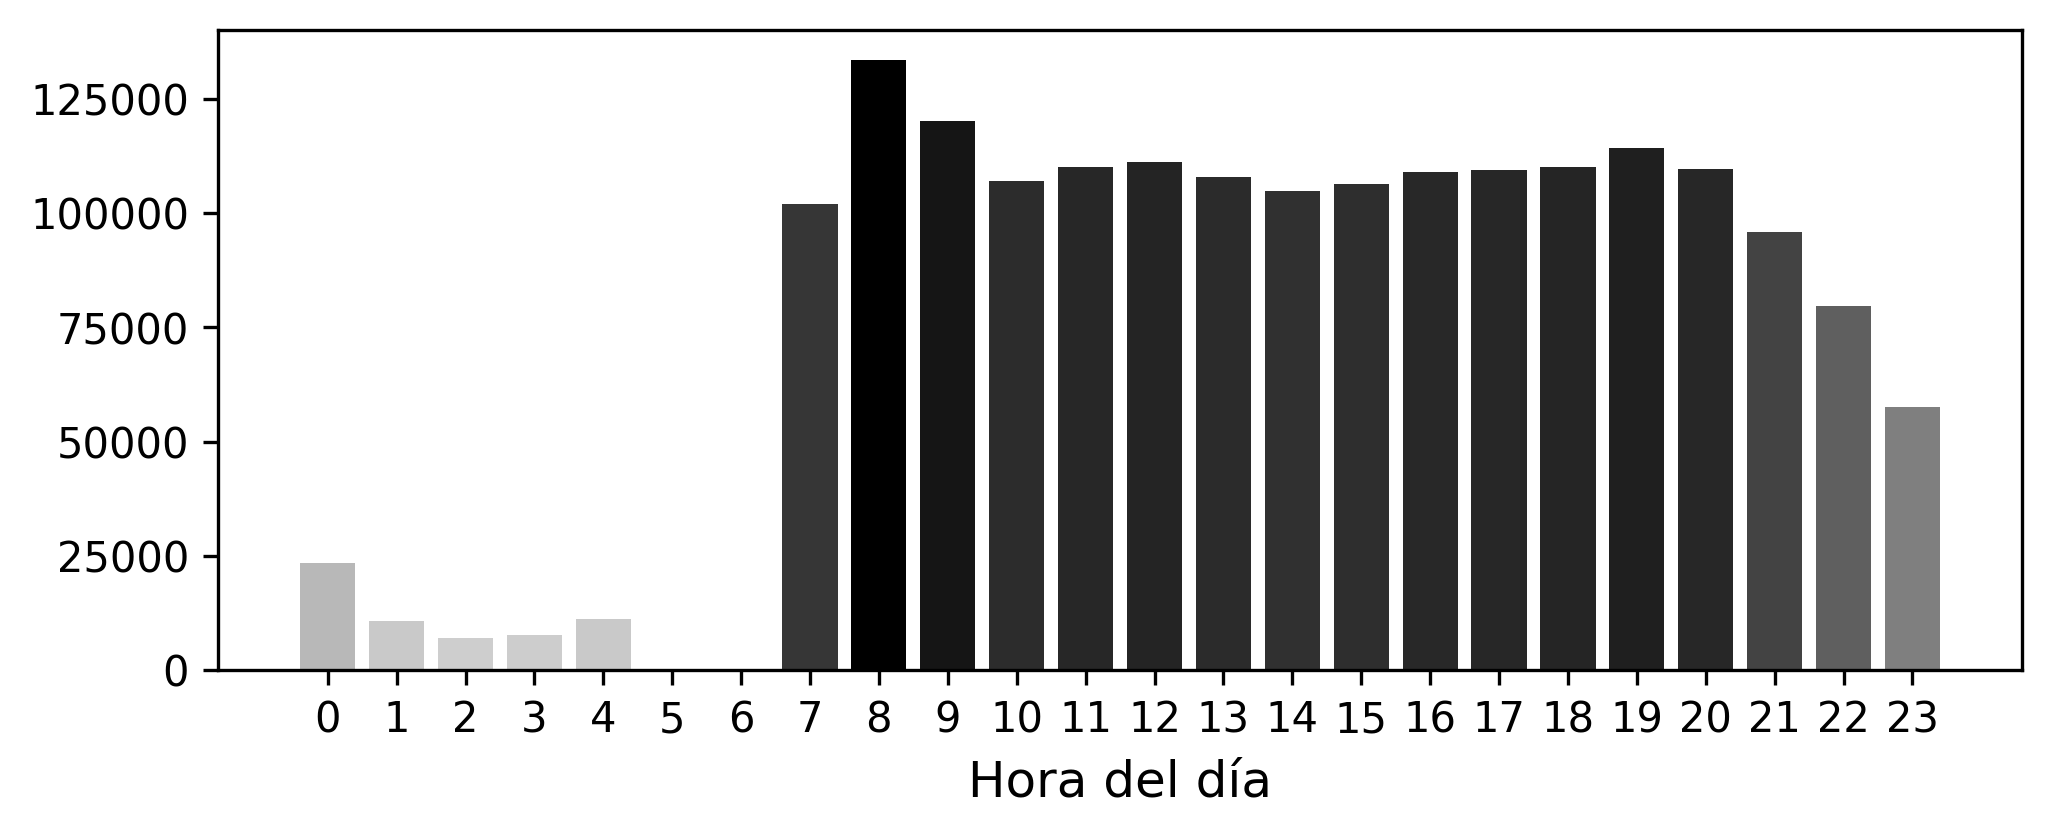

In [ ]:
normalized_frequencies = (hourly_counts - hourly_counts.min()) / (hourly_counts.max() - hourly_counts.min())


min_color_intensity = 0.3
color_range = 1.0 - min_color_intensity
colors = plt.cm.Greys(normalized_frequencies * color_range + min_color_intensity)

fig, ax = plt.subplots(figsize=(7, 3), dpi=300)
ax.bar(hourly_counts.index, hourly_counts.values, color=colors)


ax.set_xlabel('Hora del día', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_xticks(range(0, 24))
ax.tick_params(axis='y', labelsize=10)
ax.set_xticklabels(range(0, 24), fontsize=10)


plt.tight_layout()
plt.savefig('SmallOne.png', dpi=300, transparent=True, bbox_inches='tight')


plt.show()

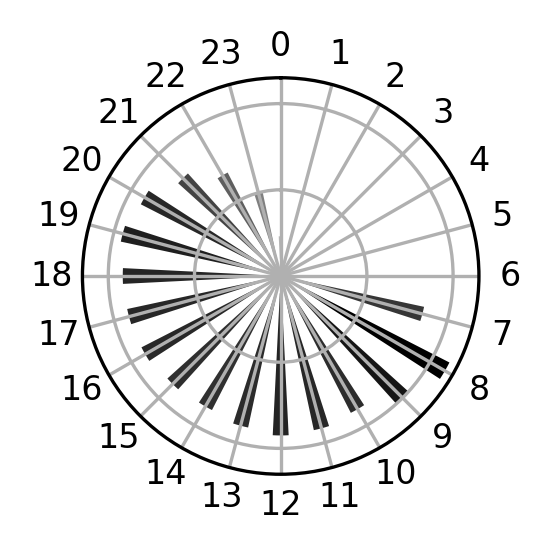

In [ ]:

# Convertir el índice de horas a radianes para el gráfico polar
hours_in_radians = 2 * np.pi * hourly_counts.index / 24


fig, ax = plt.subplots(figsize=(2, 2), dpi=300, subplot_kw={'polar': True})

# Crear el gráfico polar con colores asignados explícitamente
bars = ax.bar(hours_in_radians, normalized_frequencies, width=0.1, bottom=0.1, color=colors)


ax.set_xticks(2 * np.pi * np.arange(24) / 24)
ax.set_xticklabels(range(24), fontsize=8)
ax.set_yticklabels([])
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

ax.tick_params(axis='x', which='major', pad=-3)
plt.tight_layout()
plt.savefig('ClockChart.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()


## Visualización final

Luego se procedio a unir ambas graficas de manera didáctica para una interpretación mas amena para el publico en general. Las imágenes de tipo “pixel art” fueron creadas por medio de un modelo IA con algunas modificaciones hechas en Python en compañía de Illustrator (adobe).


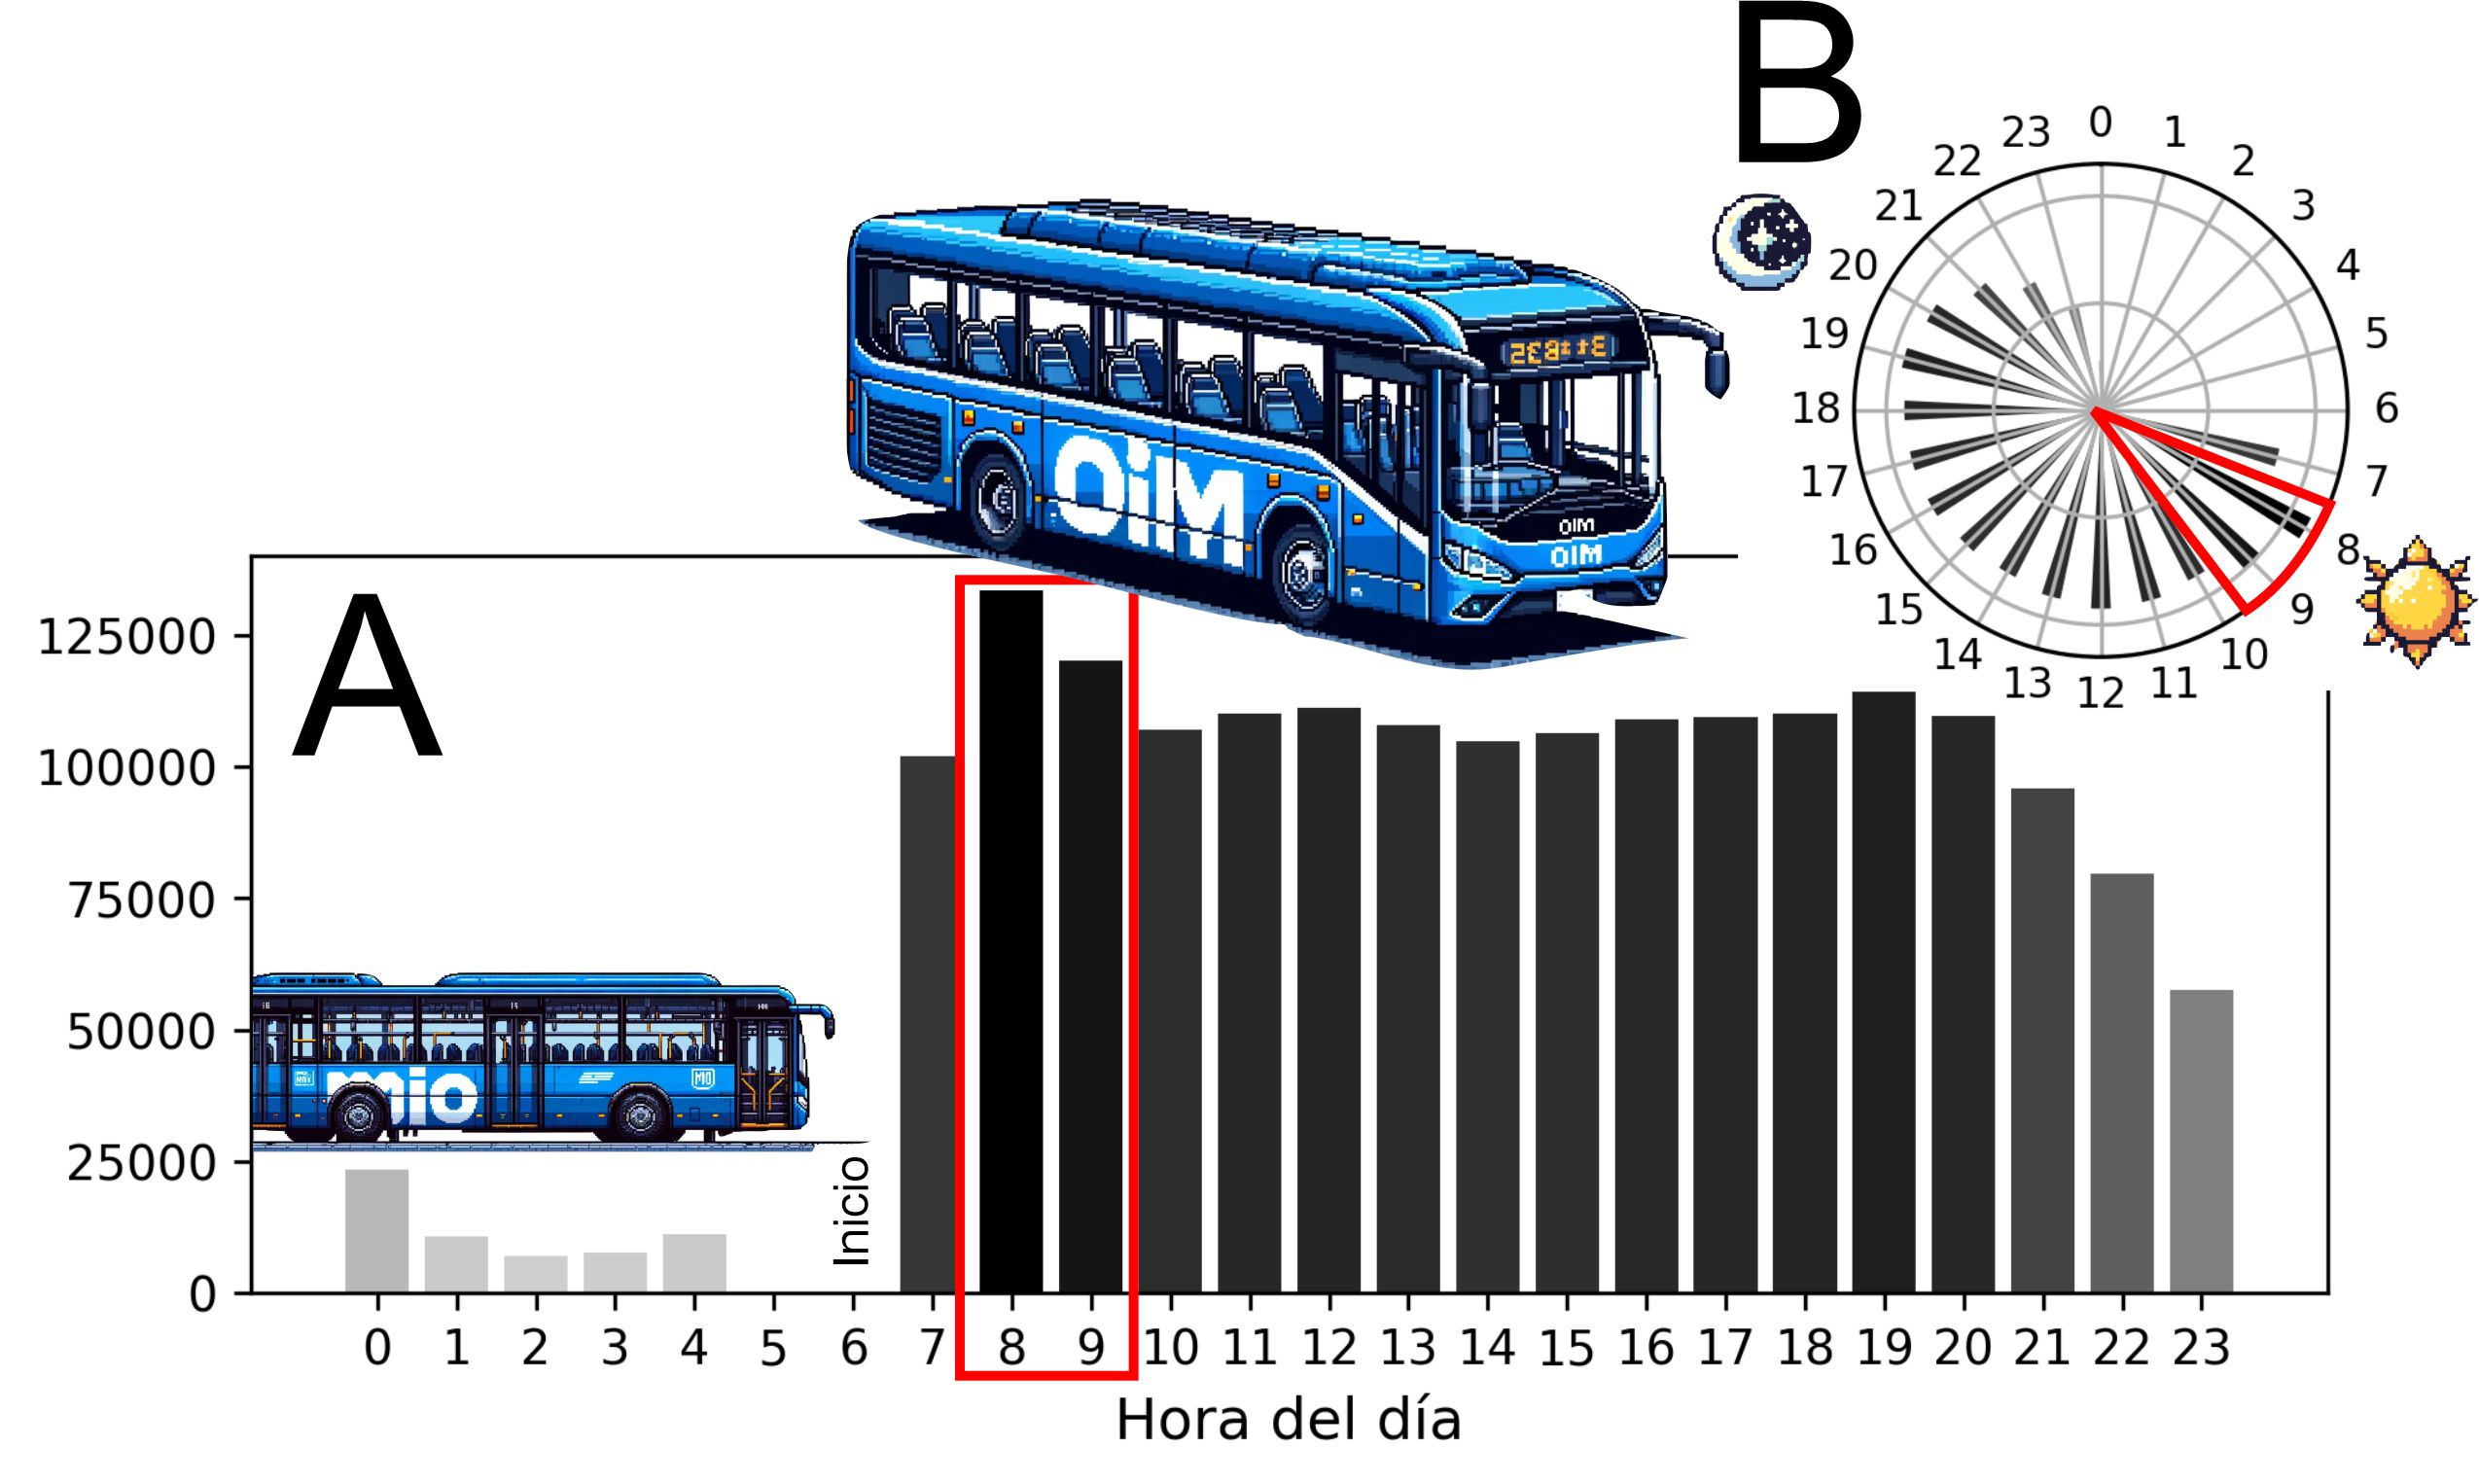

In [95]:
# @title

from IPython.display import Image

# Ruta de la imagen en tu unidad de Google Drive
ruta_imagen = '/content/drive/MyDrive/Procesamiento_distribuido/graph_tamura_final.jpg'

# Muestra la imagen con un tamaño personalizado (por ejemplo, ancho de 800 píxeles)
Image(filename=ruta_imagen, width=600)





**Figura 1.** Se representa la frecuencia de vehículos de la plataforma “MIO” en la ciudad de Cali en la fecha del 28 de abril del 2019 durante las diferentes horas del día. A es la representación en histograma con su hora de inicio marcada a las 6.00am como el punto de inicio de la actividad de la estructura de transporte publico y B es la representación de reloj circular hecha por medio, donde los valores observados se calcularon por medio de la conversión de horas a radianes para una representación polar. Coloración más oscura visualiza de igual manera la frecuencia de vehículos, cómo delimitación roja muestra puntos de mayor frecuencia de vehículos de transporte masivo (8.00 a 9.00am).